## Imports

In [1]:
import cv2
import random
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import time


from numpy import genfromtxt
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
from mpl_toolkits.mplot3d import Axes3D


from sklearn.linear_model import LogisticRegression
#----------------------------------------------Neural Net Imports
from keras.datasets import mnist
from keras.preprocessing.image import load_img, array_to_img
from keras.utils.np_utils import to_categorical

# Linear stack of NN layers
from keras.models import Sequential

# Ensure Fully connected layer 
from keras.layers import Dense
#----------------------------------------------------------------

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import cross_val_predict


num_pixels = 28
%matplotlib inline

Using TensorFlow backend.


In [2]:
# Importing training  data from CSV files
x_train = genfromtxt('Data/Training/x_train_gr_smpl.csv', delimiter=',', skip_header =1)
y_train = genfromtxt('Data/Training/y_train_smpl.csv', delimiter=',', skip_header =1 )

In [3]:
# Importing testing data from CSV files
x_test = genfromtxt('Data/Testing/x_test_gr_smpl.csv', delimiter=',', skip_header =1)
y_test = genfromtxt('Data/Testing/y_test_smpl.csv', delimiter=',', skip_header =1 )

In [4]:
# Check data has been imported correctly 
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(12660, 2304)
(12660,)
(4170, 2304)
(4170,)


## Preprocessing

In [5]:
# Combinging data with labels

y_train = y_train.reshape(12660,1)
train_data_combined = np.append(x_train, y_train, axis=1)

y_test = y_test.reshape(4170,1)
test_data_combined = np.append(x_test, y_test, axis=1)


In [6]:
# Randomises row order in a reproducable way 
np.random.seed(0)
np.random.shuffle(train_data_combined)
np.random.shuffle(test_data_combined)

In [7]:
# Split data and lables that have undergone the same randomization process
x_train = train_data_combined[:,:-1]
y_train = train_data_combined[:, [-1]].reshape(12660,)

x_test = test_data_combined[:,:-1]
y_test = test_data_combined[:, [-1]].reshape(4170,)

In [8]:
# Normalisation of pixels
x_train = x_train.astype('float')/255
x_test  = x_test.astype('float')/255

In [9]:
#  Reducing the number of attributes using opencv's reduce functionality as shown in the second python Lecture
#  As seen in python lectures: https://vision.hw.ac.uk/webapps/blackboard/content/listContent.jsp?course_id=_94419_1&content_id=_3391865_1

x_train = np.apply_along_axis(
        func1d=lambda img: cv2.resize(img.reshape((48,48)), (num_pixels,num_pixels)),
        axis =1, arr = x_train).reshape((-1,num_pixels*num_pixels))

x_test  = np.apply_along_axis(
        func1d=lambda img: cv2.resize(img.reshape((48,48)), (num_pixels,num_pixels)),
        axis =1, arr = x_test).reshape((-1,num_pixels*num_pixels))

In [10]:
x_train.shape

(12660, 784)

In [11]:
# # Creating 10 bins for output
y_train = to_categorical(y_train,10)
y_test = to_categorical(y_test,10)

print(y_train.shape) 
print(y_test.shape)

(12660, 10)
(4170, 10)


# Neural Networks

## Buiding MLP Architecture

In [12]:
# Specifying Sequential Model
model = Sequential()

In [13]:
# Dense Adds fully connected nodes in each layer 

# Input layer is the number of pixels & their values 

# Layer 1
model.add(Dense(512, activation = 'relu',input_shape=(784,)))

# Layer 2
model.add(Dense(512, activation = 'relu'))

#Output Layer
model.add(Dense(10, activation = 'softmax'))


## Compiling the model

In [14]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics = ['accuracy'])

In [15]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


# Visualising ANN arcitecture. (Takes a long time to run!)

In [16]:
# https://towardsdatascience.com/visualizing-artificial-neural-networks-anns-with-just-one-line-of-code-b4233607209e
# from ann_visualizer.visualize import ann_viz;

# ann_viz(model, title="My first neural network")

In [17]:
y_train.shape

(12660, 10)

## Training the Model

In [18]:
trained_network_output = model.fit(x_train,y_train, epochs = 10, validation_data = (x_test, y_test))

Train on 12660 samples, validate on 4170 samples
Epoch 1/10
12660/12660 [==============================] - 4s 277us/step - loss: 0.8188 - accuracy: 0.7427 - val_loss: 0.6523 - val_accuracy: 0.7612
Epoch 2/10
12660/12660 [==============================] - 3s 273us/step - loss: 0.3635 - accuracy: 0.8806 - val_loss: 0.8066 - val_accuracy: 0.7480
Epoch 3/10
12660/12660 [==============================] - 3s 268us/step - loss: 0.2834 - accuracy: 0.9084 - val_loss: 0.5260 - val_accuracy: 0.8585
Epoch 4/10
12660/12660 [==============================] - 3s 269us/step - loss: 0.2349 - accuracy: 0.9213 - val_loss: 0.4761 - val_accuracy: 0.8904
Epoch 5/10
12660/12660 [==============================] - 3s 269us/step - loss: 0.1926 - accuracy: 0.9398 - val_loss: 0.4967 - val_accuracy: 0.8921
Epoch 6/10
12660/12660 [==============================] - 3s 270us/step - loss: 0.1635 - accuracy: 0.9454 - val_loss: 0.3496 - val_accuracy: 0.9161
Epoch 7/10
12660/12660 [==============================] - 3s 26

# Evaluation

### Accuracy of training model

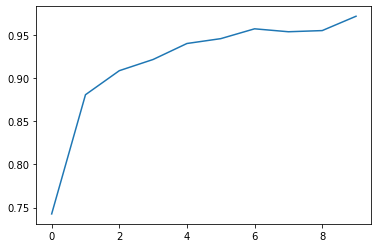

In [19]:
plt.plot(trained_network_output.history['accuracy'])

### Accuracy of training and validation set

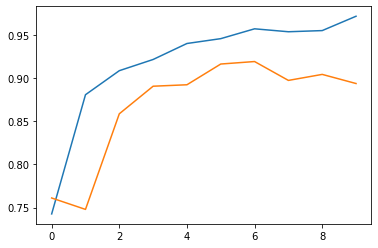

In [20]:
plt.plot(trained_network_output.history['accuracy'])
plt.plot(trained_network_output.history['val_accuracy'])

In [21]:
# Evalutation the model
score = model.evaluate(x_test, y_test)

4170/4170 [==============================] - 0s 67us/step


In [22]:
score
# 90% accuaracy!!!

[0.46296136054686077, 0.8935251832008362]

## 10-fold cross valiadation

In [23]:
# Method to construct a set MLP model
def construct_new_model():
    
    # Specifying a sequential modle 
    model = Sequential()
    
    # Dense Adds fully connected nodes in each layer 
    # Input layer is the number of pixels & their values 
    # Layer 1
    model.add(Dense(512, activation = 'relu',input_shape=(784,)))

    # Layer 2
    model.add(Dense(512, activation = 'relu'))
    
    # Output Layer
    model.add(Dense(10, activation = 'softmax'))
    
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics = ['accuracy'])
    
    return model

    

In [24]:
# Uniformly separates classes in folds: See video @12:00 https://www.youtube.com/watch?v=gJo0uNL-5Qw
# Proportion of classes is same accross all folds
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=10, random_state=None, shuffle=False)

In [25]:
# Ref:[https://www.youtube.com/watch?v=gJo0uNL-5Qw] - Used to make code more concise 
def get_score(model, x_train, x_test, y_train, y_test):
    model.fit(x_train, y_train, epochs = 10, validation_data = (x_test, y_test))
    return model.evaluate(x_test, y_test)

In [26]:
# Modification of above method
def get_network_output(model, x_train, x_test, y_train, y_test):
    x = model.fit(x_train, y_train, epochs = 10, validation_data = (x_test, y_test))
    return x

In [27]:
# Empty list to to which we wil append each folds acccuaracy 
ScoreArray = []

In [28]:
# https://stackoverflow.com/questions/48508036/sklearn-stratifiedkfold-valueerror-supported-target-types-are-binary-mul
for i, (train_index, test_index) in enumerate(skf.split(x_train, y_train.argmax(1))):
    x_train_kf, x_test_kf = x_train[train_index], x_train[test_index]
    y_train_kf, y_test_kf = y_train[train_index], y_train[test_index]
    ScoreArray.append(get_score(construct_new_model(), x_train_kf, x_test_kf, y_train_kf, y_test_kf)


SyntaxError: unexpected EOF while parsing (<ipython-input-28-1769930f390e>, line 5)

In [ ]:
ScoreArray = np.array(ScoreArray)
ScoreArray[:,1:2]

In [ ]:
# Average accuracy across the 10 folds
print(np.mean(ScoreArray[:,1:2]))

# Moving 4000 images from training to test set

In [ ]:
# Check data has been imported correctly 
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

In [ ]:
x_train_new = x_train[0:8660,:]
y_train_new = y_train[0:8660,:]

x_temp = x_train[8660:12660,:]
y_temp = y_train[8660:12660,:]

x_test_new = np.concatenate((x_test, x_temp))
y_test_new = np.concatenate((y_test, y_temp))





In [ ]:
test = get_network_output(construct_new_model(), x_train_new, x_test_new, y_train_new, y_test_new)

In [ ]:
plt.plot(test.history['accuracy'])
plt.plot(test.history['val_accuracy'])

# Moving 9000 images from training to test set


In [ ]:
x_train_new = x_train[0:6660,:]
y_train_new = y_train[0:6660,:]

x_temp = x_train[6660:12660,:]
y_temp = y_train[6660:12660,:]

x_test_new = np.concatenate((x_test, x_temp))
y_test_new = np.concatenate((y_test, y_temp))

In [ ]:
test2 = get_network_output(construct_new_model(), x_train_new, x_test_new, y_train_new, y_test_new)

In [ ]:
plt.plot(test2.history['accuracy'])
plt.plot(test2.history['val_accuracy'])

# Experiments

In [ ]:
# def construct_new_model(i, j, k):
#     model = Sequential()
#     # Dense Adds fully connected nodes in each layer 

#     # Input layer is the number of pixels & their values 

#     # Layer 1
#     model.add(Dense(i, activation = 'relu',input_shape=(784,)))

#     # Layer 2
#     model.add(Dense(i, activation = 'relu'))
    
#     #Output Layer
#     model.add(Dense(10, activation = 'softmax'))
    
#     model.compile(optimizer='adam', loss='categorical_crossentropy', metrics = ['accuracy'])
    
#     return model

In [ ]:
# X = []
# Y = []
# for i in range(250, 2500, 250):
#     Y.append(i)
#     j = 0.1
#     k = 0.9
#     temp_model = get_network_output(construct_new_model(i,j,k), x_train, x_test, y_train, y_test)
#     X.append(temp_model)


In [ ]:
#X[0].history['accuracy']

In [ ]:
def build_model():
  # Specifying a sequential modle 
    model = Sequential()
    
    # Dense Adds fully connected nodes in each layer 
    # Input layer is the number of pixels & their values 
    # Layer 1
    model.add(Dense(512, activation = 'relu',input_shape=(784,)))

    # Layer 2
    model.add(Dense(512, activation = 'relu'))
    
    # Output Layer
    model.add(Dense(10, activation = 'softmax'))
    
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics = ['accuracy'])
    
    return model

keras_model2 = build_model()
keras_model2.fit(x_train, y_train, epochs=10, batch_size=100, verbose=1)

In [ ]:
y_score = keras_model2.predict(x_test)

In [ ]:
y_test.shape

In [ ]:
plotROC(y_test, y_score)